<a href="https://colab.research.google.com/github/nehemiatejoasa/Pemrograman_Lanjut/blob/master/MM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. Script**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Definisi**

In [2]:
def rand_exp(x):
    return -(1/x)*np.log(np.random.rand())

**Main Code**

In [3]:
mu=1
lamda=0.8
N=100000
IAT=[0]+[rand_exp(lamda) for i in range(1, N)]
ST=[0]+[rand_exp(mu) for i in range(1, N)]
JQAT=[0]+np.cumsum(IAT)
GSAT=[0]
LSAT=[0]
TSIS=[0]
TSIQ=[0]
EN_theory=lamda*(1/(mu-lamda))

In [4]:
for i in range(1,N):
    if LSAT[i-1]<JQAT[i]:
        GSAT.append(JQAT[i])
    else:
        GSAT.append(LSAT[i-1])
    LSAT.append(ST[i]+GSAT[i])

In [5]:
TSIS=TSIS+(np.array(LSAT)-JQAT)
TSIQ=TSIS-np.array(ST)
TSIS_cumsum=np.cumsum(TSIS)
TSIS_ave=[TSIS_cumsum[i-1]/(i-1) for i in range(1, len(TSIS)+1)]
IAT_cumsum=np.cumsum(IAT)
IAT_ave=[IAT_cumsum[i-1]/(i-1) for i in range(1, len(IAT)+1)]
TQIS=np.array(TSIS)-np.array(ST)
EN=np.array(TSIS_ave)*lamda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [6]:
data={
    'IAT':IAT,
    'JQAT':JQAT,
    'ST':ST,
    'GSAT':GSAT,
    'LSAT':LSAT,
    'TSIS':TSIS,
    'TSIQ':TSIQ,
    'IAT-ave':IAT_ave,
    'TSIS_ave':TSIS_ave,
    'E[N]':EN
}
df=pd.DataFrame(data=data)
df

,IAT,JQAT,ST,GSAT,LSAT,TSIS,TSIQ,IAT-ave,TSIS_ave,E[N]
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN
1,2.139279,2.139279,0.031816,2.139279,2.171094,0.031816,-2.775558e-17,2.139279,0.031816,0.025453
2,0.853767,2.993045,0.001611,2.993045,2.994656,0.001611,-8.651933e-17,1.496523,0.016714,0.013371
3,1.801124,4.794169,0.819279,4.794169,5.613448,0.819279,0.000000e+00,1.598056,0.284235,0.227388
4,0.075187,4.869356,0.088020,5.613448,5.701468,0.832113,7.440921e-01,1.217339,0.421205,0.336964
...,...,...,...,...,...,...,...,...,...,...
99995,2.066606,125367.983135,0.004991,125367.983135,125367.988126,0.004991,4.555711e-12,1.253743,4.957146,3.965717
99996,0.350448,125368.333582,0.014965,125368.333582,125368.348547,0.014965,-3.906438e-12,1.253733,4.957097,3.965677
99997,0.991083,125369.324665,0.020538,125369.324665,125369.345203,0.020538,-3.233726e-12,1.253731,4.957047,3.965638
99998,0.367695,125369.692360,0.726708,125369.692360,125370.419068,0.726708,-5.620726e-12,1.253722,4.957005,3.965604


**B. Grafik E[N]**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


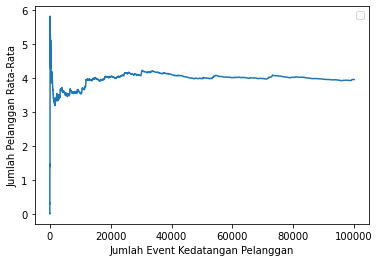

In [7]:
sns.lineplot(df.index,df['E[N]'])
plt.xlabel('Jumlah Event Kedatangan Pelanggan')
plt.ylabel('Jumlah Pelanggan Rata-Rata')
plt.legend()
plt.show()

**C.Grafik Simulasi vs Teori**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


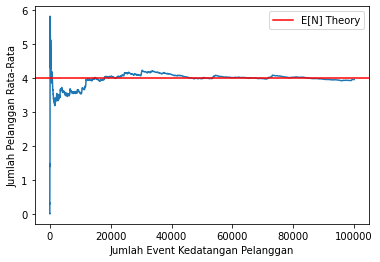

In [8]:
sns.lineplot(df.index,df['E[N]'])
plt.axhline(EN_theory,color='r', label='E[N] Theory')
plt.xlabel('Jumlah Event Kedatangan Pelanggan')
plt.ylabel('Jumlah Pelanggan Rata-Rata')
plt.legend()
plt.show()